# Data Analysis

#### Setup

In [1]:
# Libraries
import os
import sys
import re

import time
import datetime

import difflib
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

from collections import Counter
from sklearn.cluster import KMeans
from scipy import stats


In [2]:
# Set display options
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)
pd.set_option("display.width", 1000)

In [3]:
# Define path to the CSV files
data_path = "../data/raw/"

In [4]:
# Load the CSV data into a pandas DataFrame
try: 
    df_clients = pd.read_csv(os.path.join(data_path, "clients.csv"))
    df_sample = pd.read_csv(os.path.join(data_path, "sample.csv"))
    df_schedules = pd.read_csv(os.path.join(data_path, "schedules.csv"))
    df_translators = pd.read_csv(os.path.join(data_path, "translatorsCostPairs.csv"))
except FileNotFoundError as e:
    print(f"File not found: {e}")

#### Overview

In [5]:
tuples_df = {
    "Clients": df_clients,
    "Sample": df_sample,
    "Schedules": df_schedules,
    "Translators": df_translators
}

In [6]:
print("MISSING VALUES\n")

for name, df in tuples_df.items():
    print(f"{name} Dataset")
    print(f"{df.isnull().sum().sum()} missing values\n")

MISSING VALUES

Clients Dataset
0 missing values

Sample Dataset
0 missing values

Schedules Dataset
0 missing values

Translators Dataset
0 missing values



In [7]:
print("DUPLICATED VALUES\n")

for name, df in tuples_df.items():
    print(f"{name} Dataset")
    print(f"\t{df.duplicated().sum()} duplicated value\n")

DUPLICATED VALUES

Clients Dataset
	0 duplicated value

Sample Dataset
	0 duplicated value

Schedules Dataset
	0 duplicated value

Translators Dataset
	0 duplicated value



In [8]:
print("UNIQUE VALUES\n")

for name, df in tuples_df.items():
    print(f"{name} Dataset")
    print(f"\tUnique Values:")
    for col in df.columns:
        print(f"\t\t{col}: {df[col].nunique()}")    
    print()

UNIQUE VALUES

Clients Dataset
	Unique Values:
		CLIENT_NAME: 2646
		SELLING_HOURLY_PRICE: 14
		MIN_QUALITY: 4
		WILDCARD: 3

Sample Dataset
	Unique Values:
		PROJECT_ID: 1720
		PM: 4
		TASK_ID: 31009
		START: 18318
		END: 6440
		TASK_TYPE: 6
		SOURCE_LANG: 11
		TARGET_LANG: 18
		TRANSLATOR: 228
		ASSIGNED: 29949
		READY: 30984
		WORKING: 30977
		DELIVERED: 30985
		RECEIVED: 29801
		CLOSE: 29665
		FORECAST: 2472
		HOURLY_RATE: 35
		COST: 6824
		QUALITY_EVALUATION: 11
		MANUFACTURER: 250
		MANUFACTURER_SECTOR: 14
		MANUFACTURER_INDUSTRY_GROUP: 70
		MANUFACTURER_INDUSTRY: 85
		MANUFACTURER_SUBINDUSTRY: 92

Schedules Dataset
	Unique Values:
		NAME: 983
		START: 22
		END: 22
		MON: 2
		TUES: 2
		WED: 2
		THURS: 2
		FRI: 2
		SAT: 2
		SUN: 2

Translators Dataset
	Unique Values:
		TRANSLATOR: 983
		SOURCE_LANG: 40
		TARGET_LANG: 80
		HOURLY_RATE: 54



In [9]:
print("DATASETS\n")

for name, df in tuples_df.items():
    print(f"{name} Dataset")
    print(f"\t{df.shape[0]} rows and {df.shape[1]} columns")
    print(f"\tData Types:")
    for col, dtype in df.dtypes.items():
        print(f"\t\t{col}: {dtype}n")
    print()

DATASETS

Clients Dataset
	2646 rows and 4 columns
	Data Types:
		CLIENT_NAME: objectn
		SELLING_HOURLY_PRICE: int64n
		MIN_QUALITY: float64n
		WILDCARD: objectn

Sample Dataset
	31017 rows and 24 columns
	Data Types:
		PROJECT_ID: objectn
		PM: objectn
		TASK_ID: int64n
		START: objectn
		END: objectn
		TASK_TYPE: objectn
		SOURCE_LANG: objectn
		TARGET_LANG: objectn
		TRANSLATOR: objectn
		ASSIGNED: objectn
		READY: objectn
		WORKING: objectn
		DELIVERED: objectn
		RECEIVED: objectn
		CLOSE: objectn
		FORECAST: float64n
		HOURLY_RATE: int64n
		COST: float64n
		QUALITY_EVALUATION: int64n
		MANUFACTURER: objectn
		MANUFACTURER_SECTOR: objectn
		MANUFACTURER_INDUSTRY_GROUP: objectn
		MANUFACTURER_INDUSTRY: objectn
		MANUFACTURER_SUBINDUSTRY: objectn

Schedules Dataset
	983 rows and 10 columns
	Data Types:
		NAME: objectn
		START: objectn
		END: objectn
		MON: int64n
		TUES: int64n
		WED: int64n
		THURS: int64n
		FRI: int64n
		SAT: int64n
		SUN: int64n

Translators Dataset
	4690 rows and

In [10]:
def get_unique_values(df):
    """
    Get unique values for each column in a DataFrame

    Parameters:
        df (pd.DataFrame): DataFrame to get unique values from

    Returns:
        dict: Unique values for each column
    """

    unique_values = {}
    for col in df.columns:
        unique_values[col] = df[col].unique()
    return unique_values


In [11]:
cols_useful = {
    "Clients": ["CLIENT_NAME", "WILDCARD"],
    "Sample": [
        "TASK_TYPE",
        "SOURCE_LANG",
        "TARGET_LANG",
        "TRANSLATOR",
        "MANUFACTURER",
        "MANUFACTURER_SECTOR",
        "MANUFACTURER_INDUSTRY_GROUP",
        "MANUFACTURER_INDUSTRY",
        "MANUFACTURER_SUBINDUSTRY",
    ],
    "Schedules": ["NAME"],
    "Translators": ["TRANSLATOR", "SOURCE_LANG", "TARGET_LANG", "HOURLY_RATE"],
}

In [12]:
print("UNIQUE VALUES\n")

# Unique values for each column in each DataFrame
unique_values = {}

for name, df in tuples_df.items():
    unique_values[name] = get_unique_values(df[cols_useful[name]])   

for name, values in unique_values.items():
    print(f"{name} Dataset")
    for col, unique_vals in values.items():
        display(pd.DataFrame({col: unique_vals}))
    print()

UNIQUE VALUES

Clients Dataset


,CLIENT_NAME
0,Accesstra
1,AccuBank Industries
2,AccuBuild Industries
3,AccuPulse
4,Accura Systems
...,...
2641,Zenith Zippers
2642,ZenithSoft
2643,ZenithWorks Industrial Systems
2644,Zentech Machines


,WILDCARD
0,Quality
1,Deadline
2,Price



Sample Dataset


,TASK_TYPE
0,Engineering
1,Management
2,Miscellaneous
3,Translation
4,ProofReading
5,DTP


,SOURCE_LANG
0,English
1,Catalan
2,Spanish (Iberian)
3,French
4,German
5,Spanish (Global)
6,Dutch
7,Italian
8,Spanish (LA)
9,Portuguese (Brazil)


,TARGET_LANG
0,Portuguese (Brazil)
1,Spanish (Iberian)
2,Catalan
3,Galician
4,Spanish (Global)
5,English
6,Basque
7,Spanish (LA)
8,Portuguese (Iberian)
9,French


,TRANSLATOR
0,Estela
1,Jeronimo
2,Octavi
3,Ramiro Josafat
4,Victor
...,...
223,Gregorio Luis
224,Greta
225,Donato
226,Fiamma


,MANUFACTURER
0,Coastal Cottage
1,HealthyLife
2,AeroSysTech
3,MetaPro
4,SunTech
...,...
245,VidaCore Biotech
246,NexaPharm
247,ProximaMed
248,Workhorse Industries


,MANUFACTURER_SECTOR
0,Consumer Discretionary
1,Health Care
2,Information Technology
3,Industrials
4,Technology Hardware
5,Consumer Staples
6,Communication Services
7,Utilities
8,Materials
9,Financials


,MANUFACTURER_INDUSTRY_GROUP
0,Consumer Services
1,Health Care Providers
2,Software & Services
3,Electrical Equipment
4,Technology Hardware & Equipment
...,...
65,Public Fundation
66,IT Services
67,Health Care Equipment & Svcs.
68,Internet & Direct Marketing Retail


,MANUFACTURER_INDUSTRY
0,"Hotels, Restaurants & Leisure"
1,Health Care Facilities
2,Application Software
3,Electrical Components & Equipment
4,"Technology Hardware, Storage & Peripherals"
...,...
80,Public Fundation
81,Broadcasting & Cable TV
82,IT Consulting & Other Services
83,Health Care Providers & Services


,MANUFACTURER_SUBINDUSTRY
0,"Hotels, Resorts & Cruise Lines"
1,Long-Term Care Facilities
2,Systems Software
3,Electrical Components & Equipment
4,"Technology Hardware, Storage & Peripherals"
...,...
87,Capital Markets
88,Health Care Providers & Services
89,Internet Retail
90,"Tissue, Paper & Forest Products"



Schedules Dataset


,NAME
0,Abigail
1,Abelardo
2,Margarita
3,Davide
4,Paul
...,...
978,Genoveva
979,Sergi
980,Acolmiztli
981,Ana Clara



Translators Dataset


,TRANSLATOR
0,Aaron
1,Abdon
2,Abdon Isaias
3,Abdon Luis
4,Abel Irene
...,...
978,Zacarias Casio
979,Zacarias Marcelino
980,Zachary
981,Zlatan


,SOURCE_LANG
0,English
1,French
2,German
3,Italian
4,Catalan
5,Spanish (Global)
6,Spanish (Iberian)
7,Spanish (LA)
8,Dutch
9,English (UK)


,TARGET_LANG
0,Basque
1,Catalan
2,Galician
3,German
4,Portuguese (Brazil)
...,...
75,Qeqchi
76,Fulah
77,Scottish
78,German (Switzerland)


,HOURLY_RATE
0,27
1,17
2,20
3,32
4,21
...,...
49,62
50,8
51,55
52,51


#### CSV Clients

In [13]:
# Basic information
print(f"Number of columns: {df_clients.shape[1]}")
print(f"Number of unique clients: {df_clients['CLIENT_NAME'].nunique()}")

Number of columns: 4
Number of unique clients: 2646


In [14]:
# Display the first rows
print("Sample data:")
display(df_clients.head())

Sample data:


,CLIENT_NAME,SELLING_HOURLY_PRICE,MIN_QUALITY,WILDCARD
0,Accesstra,25,7.00,Quality
1,AccuBank Industries,30,7.00,Deadline
2,AccuBuild Industries,35,7.50,Quality
3,AccuPulse,25,7.50,Deadline
4,Accura Systems,40,7.50,Price


In [15]:
# Summary statistics with additional metrics skewness and kurtosis
print("Detailed summary statistics:")
numeric_cols = df_clients.select_dtypes(include=["number"])  # Select only numeric columns
client_stats = numeric_cols.describe()
client_stats.loc["skew"] = numeric_cols.skew()
client_stats.loc["kurtosis"] = numeric_cols.kurtosis()

display(client_stats)

Detailed summary statistics:


,SELLING_HOURLY_PRICE,MIN_QUALITY
count,2646.00,2646.00
mean,26.17,5.55
std,6.92,3.19
min,20.00,0.00
25%,20.00,7.00
50%,25.00,7.00
75%,25.00,7.50
max,90.00,8.00
skew,2.60,-1.14
kurtosis,11.41,-0.63


In [16]:
# Number of unique clients
print(f"Number of unique clients: {df_clients['CLIENT_NAME'].nunique()}")

Number of unique clients: 2646


In [17]:
# Check for duplicates in client names
duplicate_clients = df_clients[df_clients.duplicated(subset=["CLIENT_NAME"], keep=False)]
print(f"Number of duplicate client names: {len(duplicate_clients)}")
if len(duplicate_clients) > 0:
    print("Duplicate clients found:")
    display(duplicate_clients)

Number of duplicate client names: 0


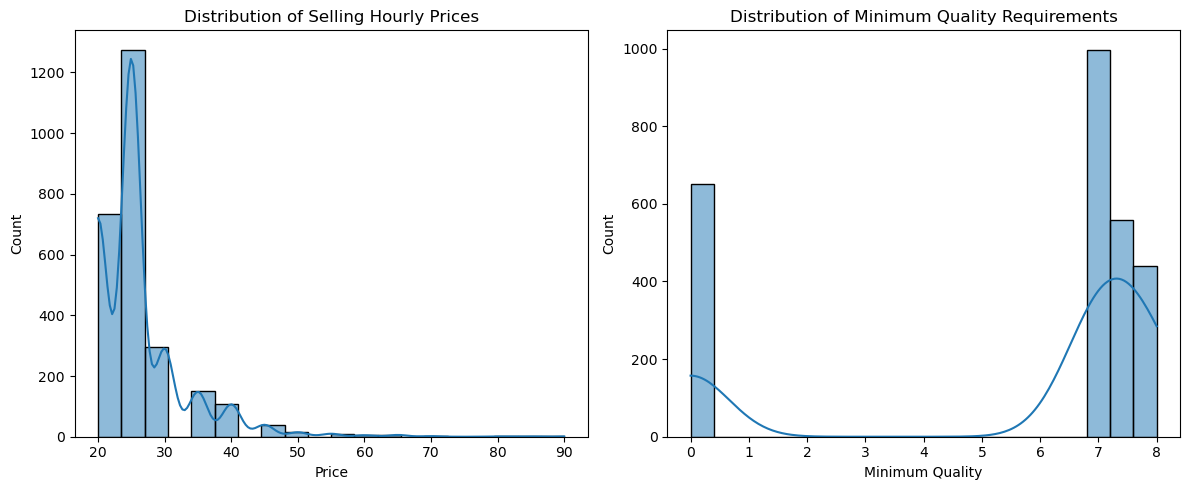

In [18]:
# Distribution of selling hourly prices and Minimum Quality requirements
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_clients["SELLING_HOURLY_PRICE"], kde=True, bins=20)
plt.title("Distribution of Selling Hourly Prices")
plt.xlabel("Price")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(df_clients["MIN_QUALITY"], kde=True, bins=20)
plt.title("Distribution of Minimum Quality Requirements")
plt.xlabel("Minimum Quality")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

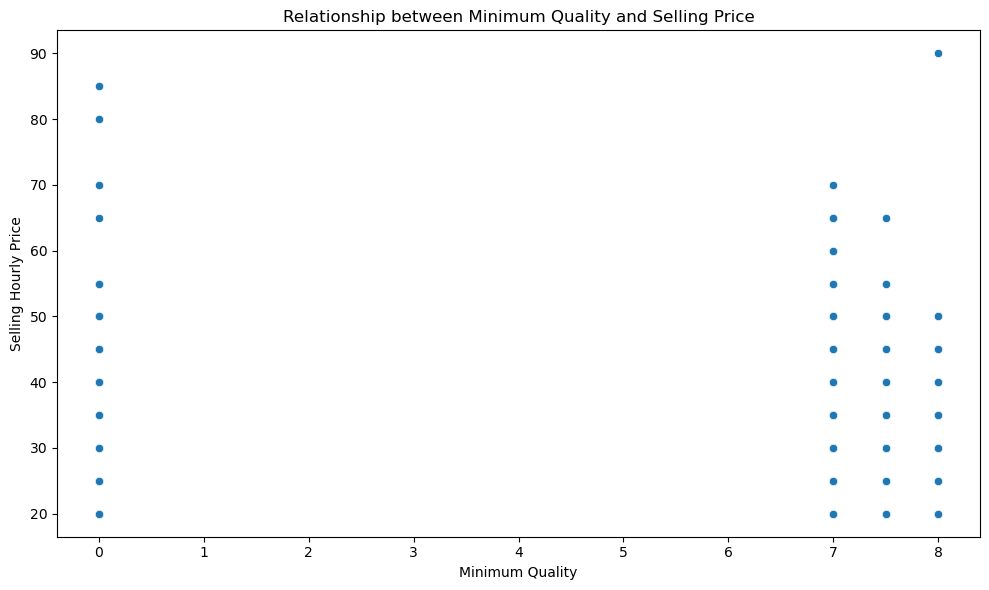

In [19]:
# Analyze relationship between selling price and Minimum Quality
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clients, x="MIN_QUALITY", y="SELLING_HOURLY_PRICE")
plt.title("Relationship between Minimum Quality and Selling Price")
plt.xlabel("Minimum Quality")
plt.ylabel("Selling Hourly Price")
plt.tight_layout()
plt.show()

In [20]:
plt.bar?

Signature:
plt.bar(
    x: 'float | ArrayLike',
    height: 'float | ArrayLike',
    width: 'float | ArrayLike' = 0.8,
    bottom: 'float | ArrayLike | None' = None,
    *,
    align: "Literal['center', 'edge']" = 'center',
    data=None,
    **kwargs,
) -> 'BarContainer'
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *height* and *width*. The vertical baseline
is *bottom* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
x : float or array-like
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : float or array-like
    The height(s) of the bars.

    Note that if *bottom* has units (e.g. datetime), *height* should be in
    units that are a difference from the value of *bottom* (e.g. timedelta).

width : float or array-like, default: 0.8
    The width(s) 

Average selling price by Minimum Quality requirement:
Quality 0: 26.36
Quality 7: 26.19
Quality 8: 26.08
Quality 8: 25.99


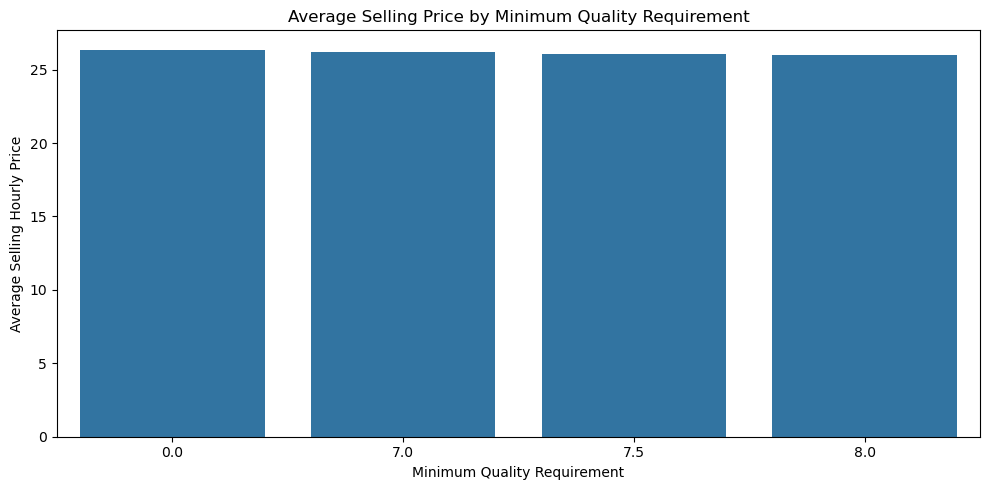

In [21]:
# Average selling price by Minimum Quality
avg_price_by_quality = df_clients.groupby("MIN_QUALITY")["SELLING_HOURLY_PRICE"].mean().reset_index()

print("Average selling price by Minimum Quality requirement:")
for quality in avg_price_by_quality["MIN_QUALITY"]:
    print(f"Quality {quality:.0f}: {avg_price_by_quality[avg_price_by_quality['MIN_QUALITY'] == quality]['SELLING_HOURLY_PRICE'].values[0]:.2f}")

plt.figure(figsize=(10, 5))
sns.barplot(data=avg_price_by_quality, x="MIN_QUALITY", y="SELLING_HOURLY_PRICE")
plt.title("Average Selling Price by Minimum Quality Requirement")
plt.xlabel("Minimum Quality Requirement")
plt.ylabel("Average Selling Hourly Price")
plt.tight_layout()
plt.show()

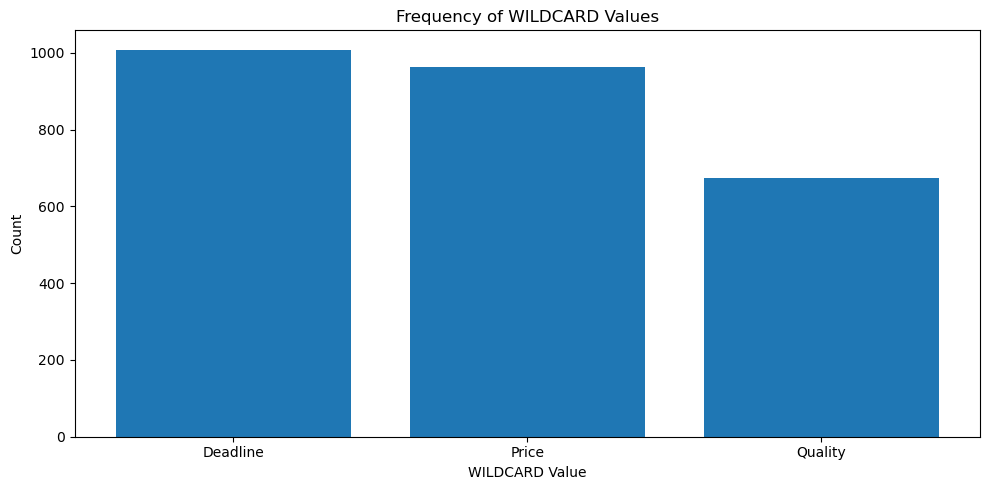

In [22]:
# WILDCARD analysis
wildcard_counts = df_clients["WILDCARD"].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(wildcard_counts.index, wildcard_counts.values)
plt.title("Frequency of WILDCARD Values")
plt.xlabel("WILDCARD Value")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Pricing Tier distribution:
	Budget (20.00 - 25.00): 2010 clients (75.96%)
	Economy (25.00 - 90.00): 636 clients (24.04%)


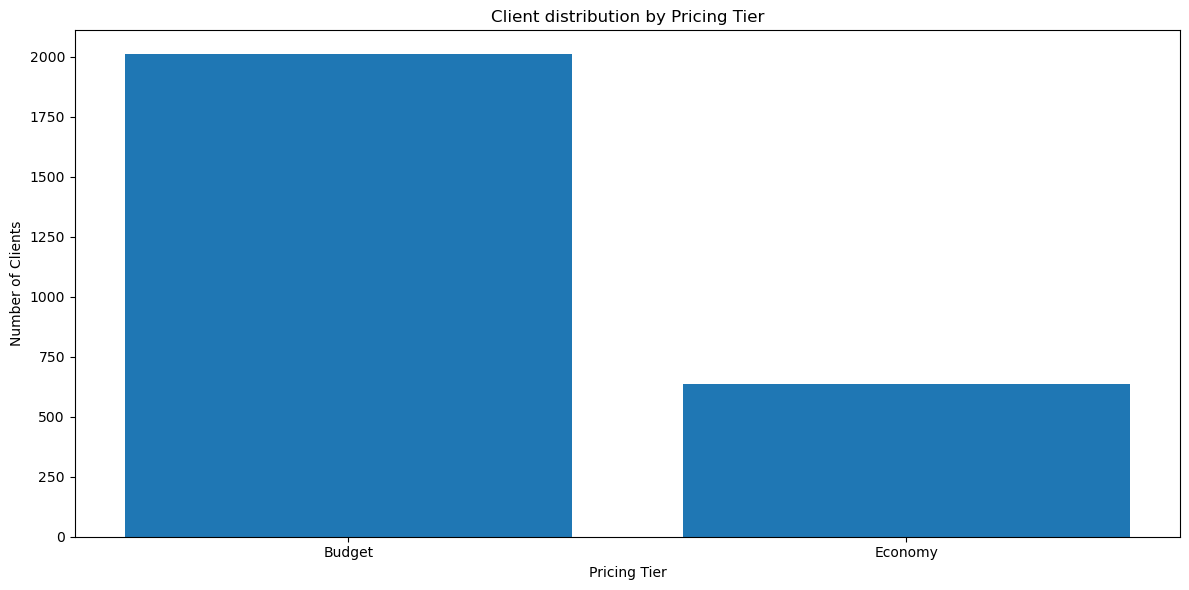

In [23]:
# Define Pricing Tiers based on quantiles
price_quantiles = df_clients["SELLING_HOURLY_PRICE"].quantile([0, 0.25, 0.5, 0.75, 1]).values
price_quantiles = pd.unique(price_quantiles) # Avoid duplicates in quantiles
pricing_tier_labels = ["Budget", "Economy", "Standard", "Premium", "Enterprise"]

# Assign Pricing Tiers based on hourly selling price
pricing_tiers = pd.cut(
    df_clients["SELLING_HOURLY_PRICE"], 
    bins=price_quantiles, 
    labels=pricing_tier_labels[:len(price_quantiles)-1],  # Adjust labels to match unique bins
    include_lowest=True
)
df_clients["PRICING_TIER"] = pricing_tiers

# Calculate Pricing Tier distribution
tier_counts = df_clients["PRICING_TIER"].value_counts().sort_index()
tier_percentages = tier_counts / len(df_clients) * 100
# print(tier_counts)

print("Pricing Tier distribution:")
for tier, count in tier_counts.items():
    percentage = tier_percentages[tier]
    price_range = f"{price_quantiles[pricing_tier_labels.index(tier)]:.2f} - {price_quantiles[pricing_tier_labels.index(tier) + 1]:.2f}"
    print(f"\t{tier} ({price_range}): {count} clients ({percentage:.2f}%)")


# Visualize Pricing Tiers
plt.figure(figsize=(12, 6))
plt.bar(tier_counts.index, tier_counts.values)
plt.title("Client distribution by Pricing Tier")
plt.xlabel("Pricing Tier")
plt.ylabel("Number of Clients")
plt.tight_layout()
plt.show()

Quality Tier distribution:
	Minimal (0 - 6): 650 clients (24.57%)
	Basic (6 - 7): 997 clients (37.68%)
	Standard (7 - 8): 999 clients (37.76%)


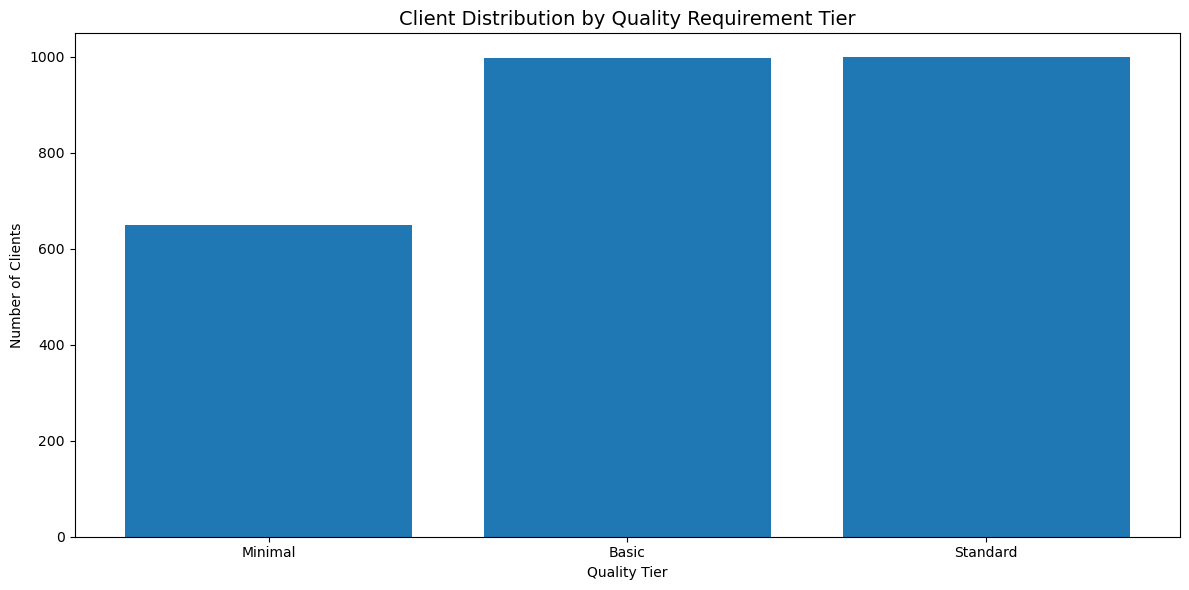

In [24]:
# Quality Tiers
quality_tier_bounds = [0, 6, 7, 8, 9, 10]
quality_tier_labels = ["Minimal", "Basic", "Standard", "High", "Premium"]

# Assign Quality Tiers based on Minimum Quality requirement
quality_tiers = pd.cut(
    df_clients["MIN_QUALITY"], 
    bins=quality_tier_bounds, 
    labels=quality_tier_labels,
    include_lowest=True
)

df_clients["QUALITY_TIER"] = quality_tiers

quality_tier_counts = df_clients["QUALITY_TIER"].value_counts().sort_index()
quality_tier_counts = quality_tier_counts[quality_tier_counts > 0]  # Remove tiers with no clients
quality_tier_percentages = quality_tier_counts / len(df_clients) * 100

print("Quality Tier distribution:")
for tier, count in quality_tier_counts.items():
    percentage = quality_tier_percentages[tier]
    tier_index = quality_tier_labels.index(tier)
    quality_range = f"{quality_tier_bounds[tier_index]} - {quality_tier_bounds[tier_index + 1]}"
    print(f"\t{tier} ({quality_range}): {count} clients ({percentage:.2f}%)")


# Visualize Quality Tiers
plt.figure(figsize=(12, 6))
plt.bar(quality_tier_counts.index, quality_tier_counts.values)
plt.title("Client Distribution by Quality Requirement Tier", fontsize=14)
plt.xlabel("Quality Tier")
plt.ylabel("Number of Clients")
plt.tight_layout()
plt.show()

Relationship between Pricing and Quality Tiers:


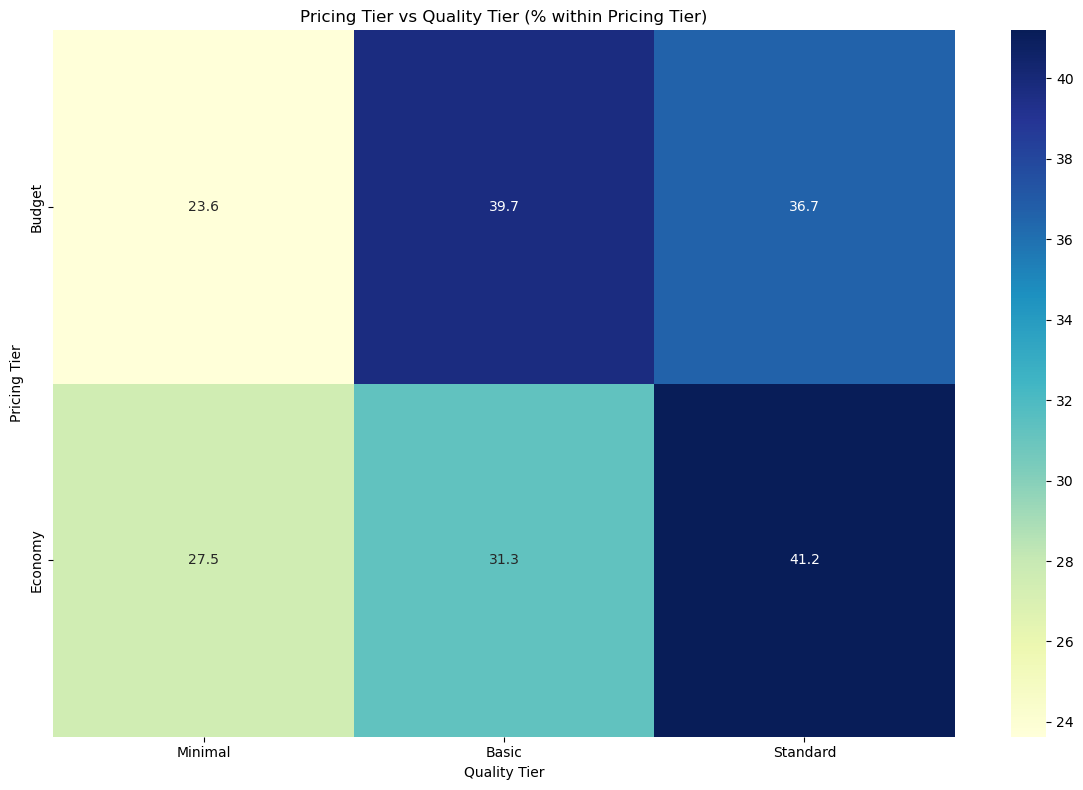

In [25]:
# Cross-tabulation of price tiers vs. Quality Tiers
price_quality_crosstab = pd.crosstab(
    df_clients["PRICING_TIER"], 
    df_clients["QUALITY_TIER"],
    normalize="index"
) * 100

print("Relationship between Pricing and Quality Tiers:")
# Create a heatmap for the cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(price_quality_crosstab, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Pricing Tier vs Quality Tier (% within Pricing Tier)")
plt.ylabel("Pricing Tier")
plt.xlabel("Quality Tier")
plt.tight_layout()
plt.show()

# Think about this as:
# - Percentage distribution of Quality Tiers within each Pricing Tier [Minimal | Basic | Standard] highlighting relationships between client pricing and quality preferences"
# - e.g, 41.2% of "Economy" clients have "Standard" quality requirements
# - e.g, 39.7% of "Budget" clients have "Basic" quality requirements

Price per Quality Point statistics:
count   2646.00
mean        inf
std         NaN
min        2.50
25%        3.12
50%        3.57
75%        8.39
max         inf
Name: PRICE_PER_QUALITY, dtype: float64


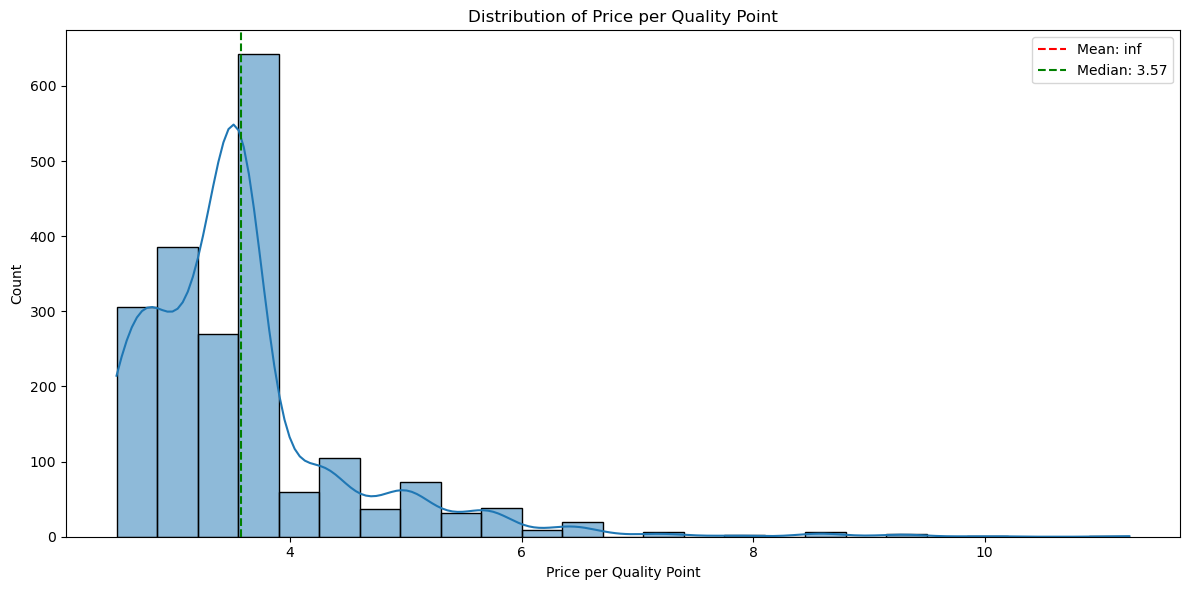

In [26]:
# How much a client pays per unit of their Minimum Quality requirement
# - Low value: They pay less per quality point, potentially a "better deal"
# - High value: They pay more per quality point, higher cost for the same quality level 

# Price per quality point
df_clients["PRICE_PER_QUALITY"] = df_clients["SELLING_HOURLY_PRICE"] / df_clients["MIN_QUALITY"]

# Display price per quality point statistics
print("Price per Quality Point statistics:")
price_per_quality_stats = df_clients["PRICE_PER_QUALITY"].describe()
print(price_per_quality_stats)

# Visualize price per quality distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_clients["PRICE_PER_QUALITY"], kde=True, bins=25)
plt.title("Distribution of Price per Quality Point")
plt.xlabel("Price per Quality Point")
plt.ylabel("Count")
plt.axvline(price_per_quality_stats["mean"], color="red", linestyle="--", label=f"Mean: {price_per_quality_stats['mean']:.2f}")
plt.axvline(price_per_quality_stats["50%"], color="green", linestyle="--", label=f"Median: {price_per_quality_stats['50%']:.2f}")
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
# Relationship between WILDCARD and selling price
print("Average selling price by WILDCARD:")
print(df_clients.groupby("WILDCARD")["SELLING_HOURLY_PRICE"].mean())

Average selling price by WILDCARD:
WILDCARD
Deadline   26.20
Price      25.97
Quality    26.44
Name: SELLING_HOURLY_PRICE, dtype: float64


In [28]:
# Relationship between WILDCARD and Minimum Quality
print("Average Minimum Quality by WILDCARD:")
print(df_clients.groupby("WILDCARD")["MIN_QUALITY"].mean())

Average Minimum Quality by WILDCARD:
WILDCARD
Deadline   5.00
Price      4.86
Quality    7.36
Name: MIN_QUALITY, dtype: float64


WILDCARD representation:
	Deadline: 1008 clients (38.10%)
	Price: 963 clients (36.39%)
	Quality: 675 clients (25.51%)

Relationship between WILDCARD and Quality Tier:


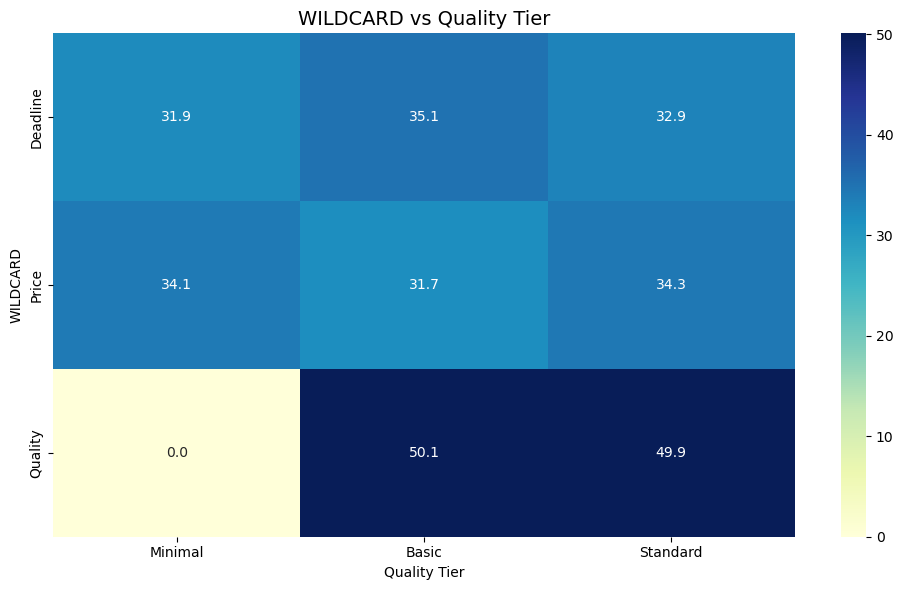


Relationship between WILDCARD and Pricing Tier:


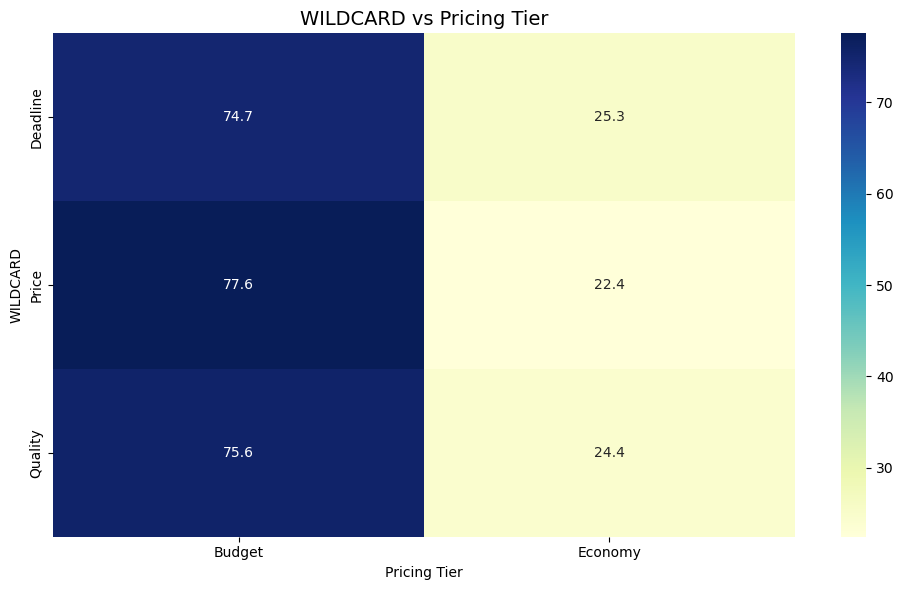

In [29]:
# Analyze WILDCARD field more deeply
print("WILDCARD representation:")
wildcard_counts = df_clients["WILDCARD"].value_counts()
wildcard_percentage = wildcard_counts / len(df_clients) * 100

for wildcard, count in wildcard_counts.items():
    percentage = wildcard_percentage[wildcard]
    print(f"\t{wildcard}: {count} clients ({percentage:.2f}%)")

# Cross-tabulate WILDCARD vs Quality Tier
wildcard_quality_crosstab = pd.crosstab(
    df_clients["WILDCARD"], 
    df_clients["QUALITY_TIER"],
    normalize="index"
) * 100

# Cross-tabulate WILDCARD vs Pricing Tier
wildcard_price_crosstab = pd.crosstab(
    df_clients["WILDCARD"], 
    df_clients["PRICING_TIER"],
    normalize="index"
) * 100

print("\nRelationship between WILDCARD and Quality Tier:")
# Visualize relationship between WILDCARD and Quality Tier
plt.figure(figsize=(10, 6))
sns.heatmap(wildcard_quality_crosstab, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("WILDCARD vs Quality Tier", fontsize=14)
plt.ylabel("WILDCARD")
plt.xlabel("Quality Tier")
plt.tight_layout()
plt.show()

print("\nRelationship between WILDCARD and Pricing Tier:")
# Visualize relationship between WILDCARD and Pricing Tier
plt.figure(figsize=(10, 6))
sns.heatmap(wildcard_price_crosstab, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("WILDCARD vs Pricing Tier", fontsize=14)
plt.ylabel("WILDCARD")
plt.xlabel("Pricing Tier")
plt.tight_layout()
plt.show()


# Think about this as:
# - Percentage distribution of quality/Pricing Tiers within each WILDCARD, highlighting relationships between client preferences and quality/pricing
# - e.g., 31.9% of "Deadline" WILDCARD clients have "Minimal" quality requirements
# - e.g., 39.7% of "Deadline" WILDCARD clients have "Budget" pricing requirements

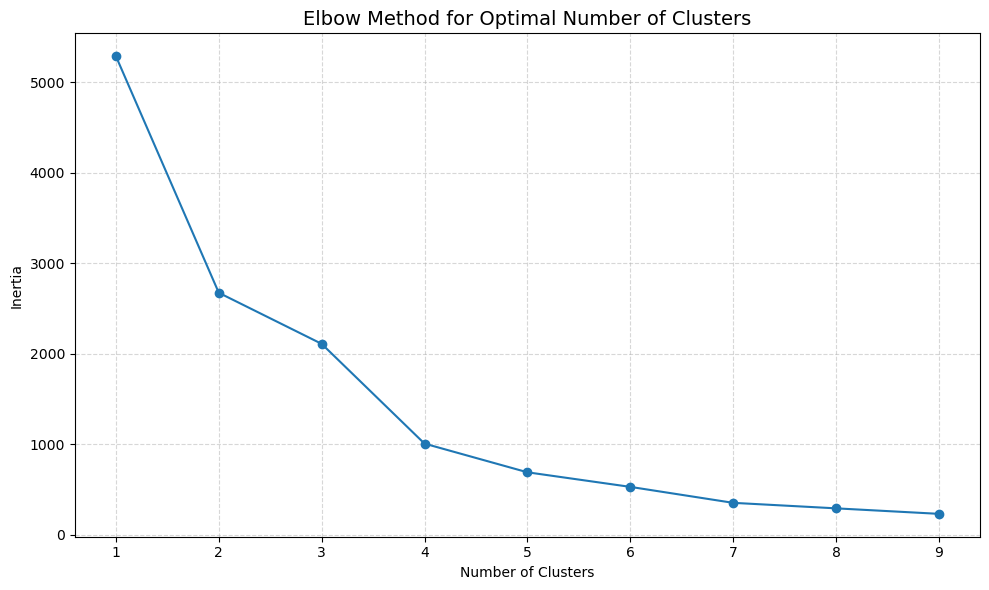

Client cluster statistics:


CLUSTER                               0      1         2         3
SELLING_HOURLY_PRICE mean         24.67  20.00     25.86     41.27
                     min             20     20        25        35
                     max             35     20        30        90
                     std           4.30   0.00      1.89      8.30
                     count          600    531      1213       302
MIN_QUALITY          mean          0.00   7.43      7.33      6.16
                     min           0.00   7.00      7.00      0.00
                     max           0.00   8.00      8.00      8.00
                     std           0.00   0.42      0.39      2.77
PRICE_PER_QUALITY    mean           inf   2.70      3.54       inf
                     min            inf   2.50      3.12      4.38
                     max            inf   2.86      4.29       inf
                     std            NaN   0.15      0.29       NaN
WILDCARD             <lambda>  Deadline  Price  Deadline  Deadline

In [30]:
# Analysis of clients based on price and quality
# - Use KMeans clustering to group clients based on selling price and Minimum Quality requirements
# - Analyze the clusters to identify different client segments

# Prepare data for clustering
cluster_data = df_clients[["SELLING_HOURLY_PRICE", "MIN_QUALITY"]].copy()

# Standardize data for KMeans
cluster_data_scaled = (cluster_data - cluster_data.mean()) / cluster_data.std()
# print(cluster_data.head())
# print(cluster_data_scaled.head())

# Determine optimal number of clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker="o")
plt.title("Elbow Method for Optimal Number of Clusters", fontsize=14)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True, alpha=0.5, linestyle="--")
plt.tight_layout()
plt.show()


# Choose optimal k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_clients["CLUSTER"] = kmeans.fit_predict(cluster_data_scaled)

# Analyze clusters
cluster_stats = df_clients.groupby("CLUSTER").agg({
    "SELLING_HOURLY_PRICE": ["mean", "min", "max", "std", "count"],
    "MIN_QUALITY": ["mean", "min", "max", "std"],
    "PRICE_PER_QUALITY": ["mean", "min", "max", "std"],
    "WILDCARD": lambda x: x.value_counts().index[0]  # Most common WILDCARD
}).round(2)

print("Client cluster statistics:")
display(cluster_stats.T)

Cluster distribution:
	Cluster 0: 600 clients (22.68%)
	Cluster 1: 531 clients (20.07%)
	Cluster 2: 1213 clients (45.84%)
	Cluster 3: 302 clients (11.41%)


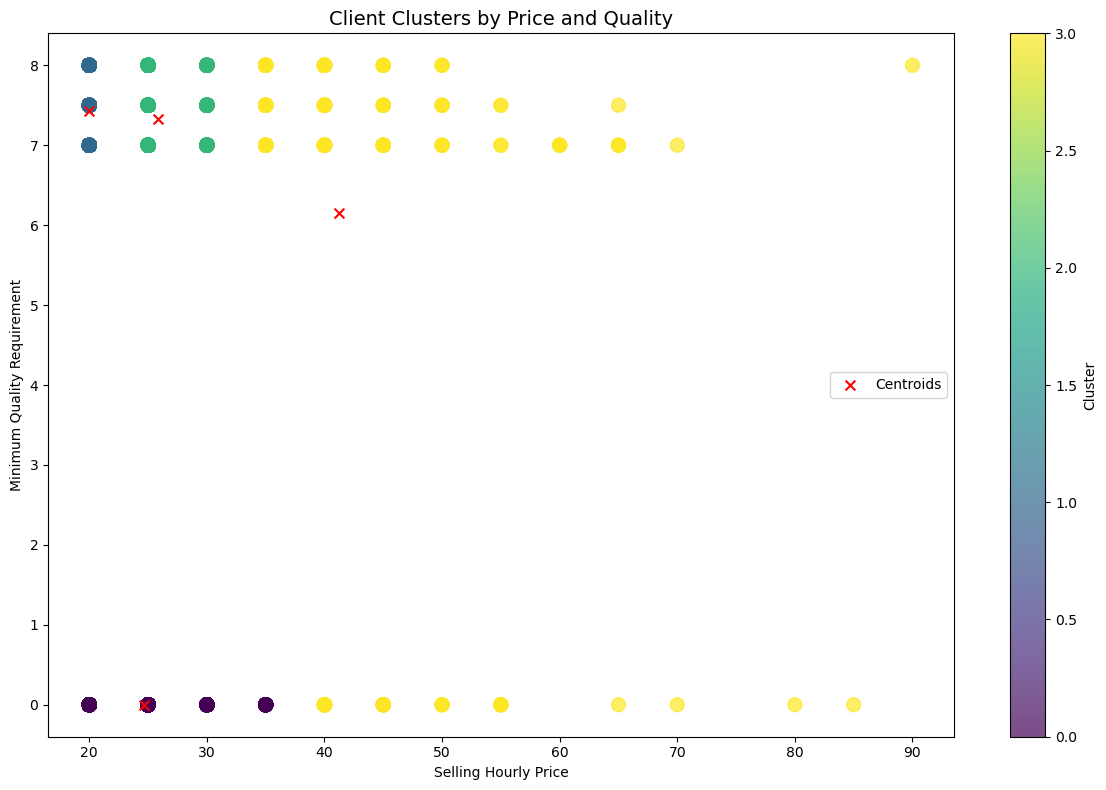

In [31]:
print("Cluster distribution:")
cluster_counts = df_clients["CLUSTER"].value_counts().sort_index()
cluster_percentages = cluster_counts / len(df_clients) * 100

for cluster, count in cluster_counts.items():
    percentage = cluster_percentages[cluster]
    print(f"\tCluster {cluster}: {count} clients ({percentage:.2f}%)")

# Visualize clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_clients["SELLING_HOURLY_PRICE"], 
    df_clients["MIN_QUALITY"],
    c=df_clients["CLUSTER"], 
    cmap="viridis",
    s=100, 
    alpha=0.7
)
plt.colorbar(scatter, label="Cluster")
plt.title("Client Clusters by Price and Quality", fontsize=14)
plt.xlabel("Selling Hourly Price")
plt.ylabel("Minimum Quality Requirement")

# Add cluster centroids
centroids = kmeans.cluster_centers_
centroids_unscaled = centroids * cluster_data.std().values + cluster_data.mean().values
plt.scatter(
    centroids_unscaled[:, 0], 
    centroids_unscaled[:, 1], 
    s=50, 
    marker="x", 
    c="red", 
    label="Centroids"
)
plt.legend()
plt.tight_layout()
plt.show()

# Most clients 

#### CSV Schedule

In [32]:
# Parse dates
if df_schedules["START"].dtype == "object":
    df_schedules["START"] = pd.to_datetime(df_schedules["START"], errors="coerce")
    df_schedules["END"] = pd.to_datetime(df_schedules["END"], errors="coerce")

/var/folders/mn/5b1ysnv91r7c936pgxljq3v80000gn/T/ipykernel_33443/4136186666.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_schedules["START"] = pd.to_datetime(df_schedules["START"], errors="coerce")
/var/folders/mn/5b1ysnv91r7c936pgxljq3v80000gn/T/ipykernel_33443/4136186666.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_schedules["END"] = pd.to_datetime(df_schedules["END"], errors="coerce")


In [33]:
print("Basic information:")
df_schedules.info()

Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   NAME    983 non-null    object        
 1   START   983 non-null    datetime64[ns]
 2   END     983 non-null    datetime64[ns]
 3   MON     983 non-null    int64         
 4   TUES    983 non-null    int64         
 5   WED     983 non-null    int64         
 6   THURS   983 non-null    int64         
 7   FRI     983 non-null    int64         
 8   SAT     983 non-null    int64         
 9   SUN     983 non-null    int64         
dtypes: datetime64[ns](2), int64(7), object(1)
memory usage: 76.9+ KB


In [34]:
print("Statistical summary:")
display(df_schedules.describe().round(2))

Statistical summary:


,START,END,MON,TUES,WED,THURS,FRI,SAT,SUN
count,983,983,983.00,983.00,983.00,983.00,983.00,983.00,983.00
mean,2025-03-21 08:44:00.488301056,2025-03-21 18:13:14.710071296,0.74,0.73,0.73,0.73,0.74,0.42,0.43
min,2025-03-21 00:00:00,2025-03-21 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2025-03-21 08:00:00,2025-03-21 18:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2025-03-21 09:00:00,2025-03-21 19:00:00,1.00,1.00,1.00,1.00,1.00,0.00,0.00
75%,2025-03-21 10:00:00,2025-03-21 20:00:00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
max,2025-03-21 23:00:00,2025-03-21 23:00:00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
std,NaN,NaN,0.44,0.44,0.44,0.44,0.44,0.49,0.49


In [35]:
print("CSV Schedules Data")
display(df_schedules.head())

CSV Schedules Data


,NAME,START,END,MON,TUES,WED,THURS,FRI,SAT,SUN
0,Abigail,2025-03-21 08:00:00,2025-03-21 18:00:00,1,1,1,1,1,0,0
1,Abelardo,2025-03-21 06:00:00,2025-03-21 16:00:00,1,1,1,1,1,1,1
2,Margarita,2025-03-21 08:00:00,2025-03-21 18:00:00,1,1,1,1,1,1,1
3,Davide,2025-03-21 09:00:00,2025-03-21 19:00:00,1,1,1,1,1,1,1
4,Paul,2025-03-21 07:00:00,2025-03-21 17:00:00,1,1,1,1,1,1,1


In [36]:
# TODO - Fix this error in preprocessing step
# CORRECT - We need to check this by adding an interval

# Duration in hours for each row
df_schedules["HOURS"] = (df_schedules["END"] - df_schedules["START"]).dt.total_seconds() / 3600

# Group by NAME and sum the hours
total_hours_per_name = df_schedules.groupby("NAME")["HOURS"].sum().reset_index()


# Obtain ONLY
negative_hours = total_hours_per_name[total_hours_per_name["HOURS"] < 0]


print("Total Hours Per Name:")
display(total_hours_per_name)

if not negative_hours.empty:
    print("Names with Negative Hours (Incorrect Data):")
    display(negative_hours)
else:
    print("No negative hours detected")


Total Hours Per Name:


,NAME,HOURS
0,Aaron,10.00
1,Abdon,10.00
2,Abdon Isaias,10.00
3,Abdon Luis,10.00
4,Abel Irene,10.00
...,...,...
978,Zacarias Casio,10.00
979,Zacarias Marcelino,10.00
980,Zachary,10.00
981,Zlatan,10.00


Names with Negative Hours (Incorrect Data):


,NAME,HOURS
44,Alejandria,-14.00
71,Almudena Jorge,-14.00
85,Amelia,-14.00
145,Araceli Enrique,-14.00
151,Aresio Casimiro,-14.00
238,Carmen Maria,-14.00
247,Catherine,-14.00
341,Edgar,-14.00
365,Emanuel,-14.00
410,Federico Alipio,-14.00


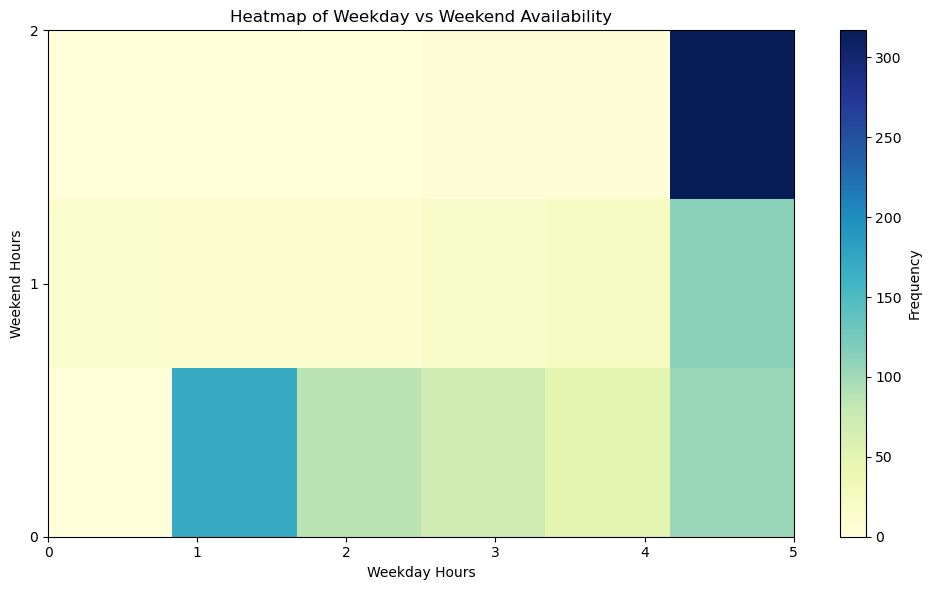

In [37]:
# TODO - Fix this error in preprocessing step
# CORRECT - We need to check this by adding an interval

# Calculate weekday and weekend hours directly
weekday_hours = df_schedules[["MON", "TUES", "WED", "THURS", "FRI"]].sum(axis=1)
weekend_hours = df_schedules[["SAT", "SUN"]].sum(axis=1)

# Create a heatmap of weekday vs weekend hours
heatmap_data, x_edges, y_edges = np.histogram2d(weekday_hours, weekend_hours, bins=(6, 3))

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data.T, origin="lower", cmap="YlGnBu", aspect="auto",
           extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
plt.colorbar(label="Frequency")
plt.title("Heatmap of Weekday vs Weekend Availability")
plt.xlabel("Weekday Hours")
plt.ylabel("Weekend Hours")
plt.xticks(range(int(x_edges[0]), int(x_edges[-1]) + 1))
plt.yticks(range(int(y_edges[0]), int(y_edges[-1]) + 1))
plt.tight_layout()
plt.show()


#### CSV Translators Cost Pairs

In [38]:
print("Basic information:")
df_translators.info()

Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TRANSLATOR   4690 non-null   object
 1   SOURCE_LANG  4690 non-null   object
 2   TARGET_LANG  4690 non-null   object
 3   HOURLY_RATE  4690 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 146.7+ KB


In [39]:
print(f"Number of unique translators: {df_translators['TRANSLATOR'].nunique()}")
print(f"Number of source languages: {df_translators['SOURCE_LANG'].nunique()}")
print(f"Number of target languages: {df_translators['TARGET_LANG'].nunique()}")

Number of unique translators: 983
Number of source languages: 40
Number of target languages: 80


In [40]:
print(f"Number of unique language pairs: {df_translators.groupby(['SOURCE_LANG', 'TARGET_LANG']).ngroups}")

Number of unique language pairs: 300


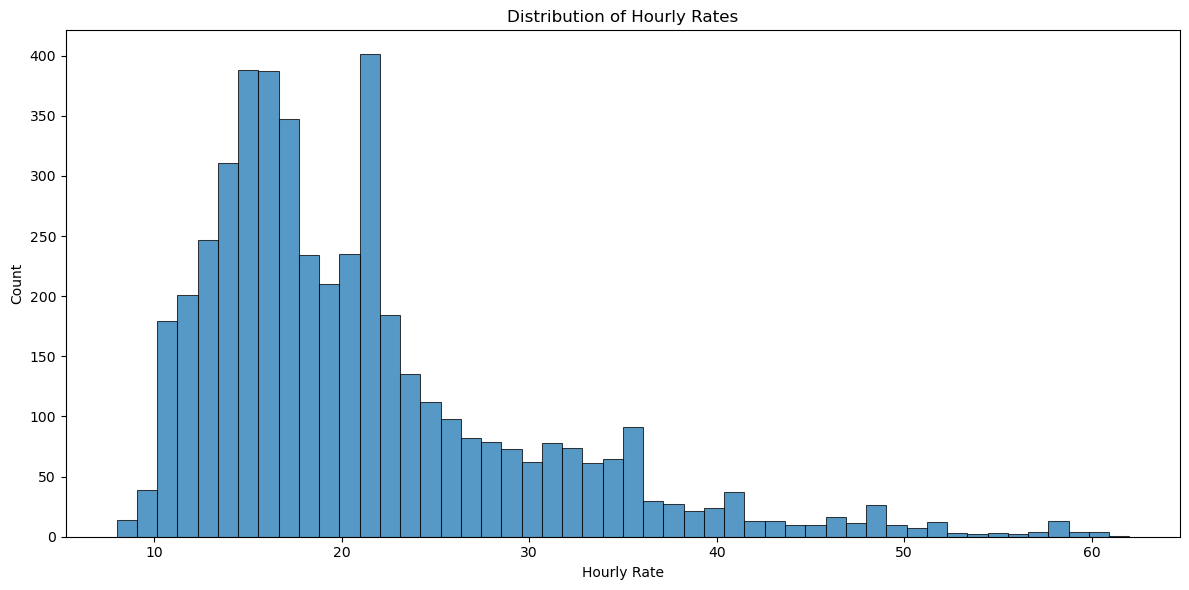

In [41]:
# Distribution of hourly rates
plt.figure(figsize=(12, 6))
plt.hist(df_translators["HOURLY_RATE"], bins=50, alpha=0.75, linewidth=0.75, edgecolor="black")
plt.title("Distribution of Hourly Rates")
plt.xlabel("Hourly Rate")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

TOP Translator Pair Languages


,SOURCE_LANG,TARGET_LANG,COUNT
95,English,Spanish (Iberian),552
96,English,Spanish (LA),352
94,English,Spanish (Global),326
40,English,Catalan,201
247,Spanish (Iberian),English,141
57,English,Galician,116
168,German,Spanish (Iberian),116
80,English,Portuguese (Brazil),107
81,English,Portuguese (Iberian),102
37,English,Basque,89


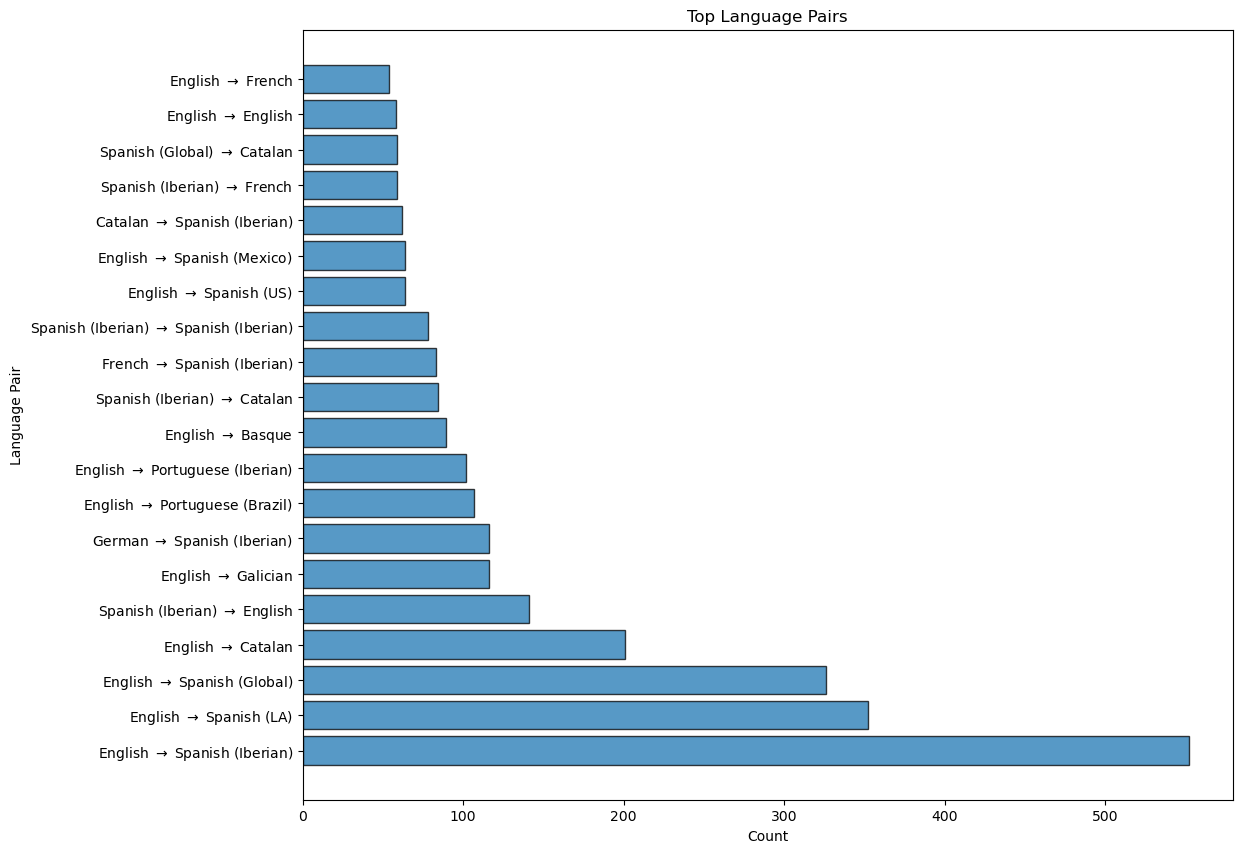

LEAST Common Translator Pair Languages


,SOURCE_LANG,TARGET_LANG,COUNT
0,Afrikaans,Afrikaans,1
2,Aymara,Spanish (Iberian),1
28,Dutch,Catalan,1
26,Danish,English,1
279,Spanish (Iberian),Ukrainian,1
281,Spanish (LA),Aymara,1
35,English,Azeri,1
33,English,Asturian,1
277,Spanish (Iberian),Swedish,1
69,English,Kazakh,1


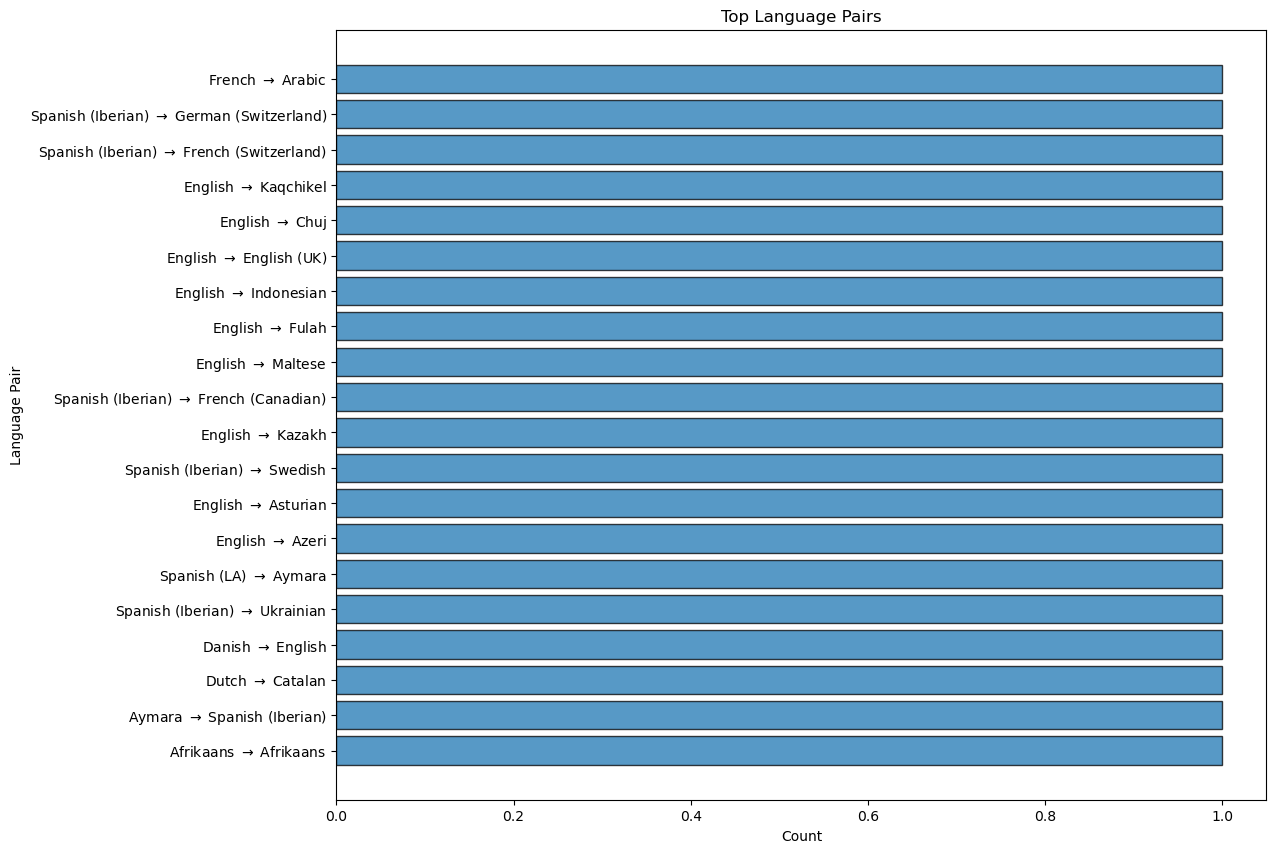

In [42]:
# OBtain the language pairs
pair_languages = df_translators.groupby(["SOURCE_LANG", "TARGET_LANG"]).size().reset_index(name="COUNT")


# Order by the most common language pairs
pair_languages_top = pair_languages.sort_values("COUNT", ascending=False).head(20)

# Order by the less common language pairs
pair_languages_bottom = pair_languages.sort_values("COUNT", ascending=True).head(20)

print("TOP Translator Pair Languages")
display(pair_languages_top)

plt.figure(figsize=(12, 10))
plt.barh(pair_languages_top.apply(lambda x: f"{x['SOURCE_LANG']} $\\rightarrow$ {x['TARGET_LANG']}", axis=1), pair_languages_top["COUNT"], alpha=0.75, linewidth=1, edgecolor="black")
plt.xlabel("Count")
plt.ylabel("Language Pair")
plt.title("Top Language Pairs")
plt.show()



print("LEAST Common Translator Pair Languages")
display(pair_languages_bottom)

plt.figure(figsize=(12, 10))
plt.barh(pair_languages_bottom.apply(lambda x: f"{x['SOURCE_LANG']} $\\rightarrow$ {x['TARGET_LANG']}", axis=1), pair_languages_bottom["COUNT"], alpha=0.75, linewidth=1, edgecolor="black")
plt.xlabel("Count")
plt.ylabel("Language Pair")
plt.title("Top Language Pairs")
plt.show()

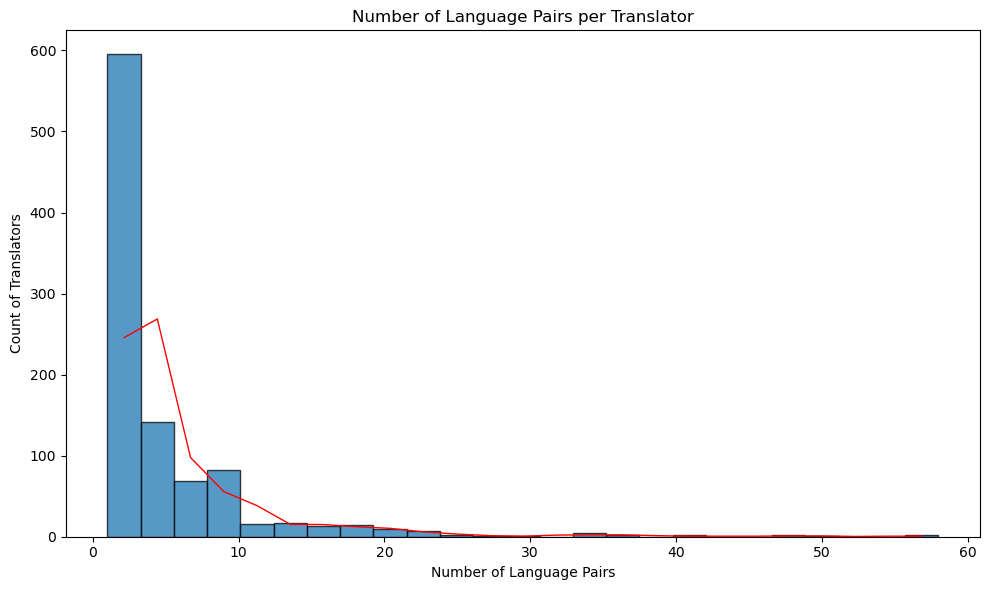

Translators with most language pairs:
          TRANSLATOR  language_pair_count
6            Abigail                   58
824              Pau                   57
388           Estela                   51
789           Octavi                   48
953           Victor                   47
437         Gabriela                   41
72      Alonso Dimas                   40
669      Luis Felipe                   36
33              Aino                   36
522  Isaias Venancio                   35


In [43]:
# Group data by translator and count language pairs per translator
translator_lang_pair_counts = df_translators.groupby("TRANSLATOR").size().reset_index(name="language_pair_count")

# Extract the counts for plotting
counts_data = translator_lang_pair_counts["language_pair_count"]

plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(counts_data, bins=25, alpha=0.75, edgecolor="black", linewidth=1)
bin_centers = 0.5 * (bins[:-1] + bins[1:]) # Calculate bin centers

# Calculate normalized frequency density
y = counts / (sum(counts) * np.diff(bins))
y_scaled = y * len(counts_data)  # Scale to match histogram height


# Apply smoothing (Simple Moving Average)
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode="same")
    return y_smooth


# Plot the density curve
plt.plot(bin_centers, smooth(y_scaled, 3) * np.mean(np.diff(bins)), "r-", linewidth=1)
plt.title("Number of Language Pairs per Translator")
plt.xlabel("Number of Language Pairs")
plt.ylabel("Count of Translators")

plt.tight_layout()
plt.show()

print("Translators with most language pairs:")
print(translator_lang_pair_counts.sort_values("language_pair_count", ascending=False).head(10))

In [44]:
# Correlation between rates and languages
avg_rate_by_source = df_translators.groupby("SOURCE_LANG")["HOURLY_RATE"].mean().sort_values(ascending=False)
avg_rate_by_target = df_translators.groupby("TARGET_LANG")["HOURLY_RATE"].mean().sort_values(ascending=False)

Average hourly rate by source language (Top 10):
SOURCE_LANG
Greek       54.75
Czech       51.33
Norwegian   44.17
Quechua     41.75
Slovak      40.00
Swedish     39.83
Korean      35.33
Arabic      34.50
Russian     33.06
Polish      32.50
Name: HOURLY_RATE, dtype: float64

Average hourly rate by target language (Top 10):
TARGET_LANG
Maltese                58.00
Qeqchi                 53.67
French (Switzerland)   52.00
Fulah                  52.00
Swedish                52.00
Slovenian              51.50
Estonian               51.50
Flemish                51.00
Norwegian              50.65
Hebrew                 49.45
Name: HOURLY_RATE, dtype: float64


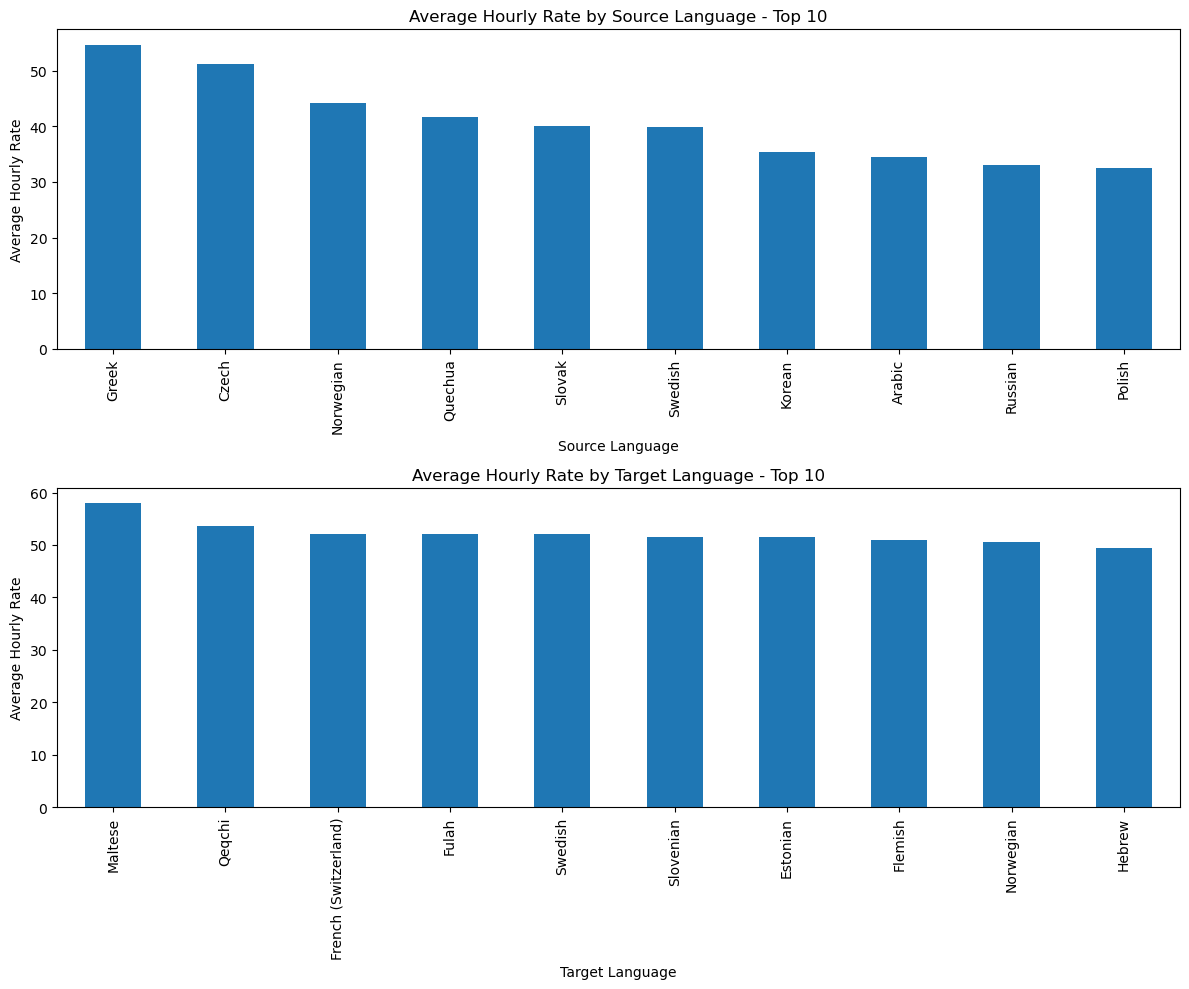

In [45]:
print("Average hourly rate by source language (Top 10):")
print(avg_rate_by_source.head(10))
print()

print("Average hourly rate by target language (Top 10):")
print(avg_rate_by_target.head(10))

# Visualize average rates for top languages
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
avg_rate_by_source.head(10).plot(kind="bar")
plt.title("Average Hourly Rate by Source Language - Top 10")
plt.xlabel("Source Language")
plt.ylabel("Average Hourly Rate")

plt.subplot(2, 1, 2)
avg_rate_by_target.head(10).plot(kind="bar")
plt.title("Average Hourly Rate by Target Language - Top 10")
plt.xlabel("Target Language")
plt.ylabel("Average Hourly Rate")

plt.tight_layout()
plt.show()

#### CSV Sample

In [46]:
print("Basic information:")
df_sample.info()

Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31017 entries, 0 to 31016
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PROJECT_ID                   31017 non-null  object 
 1   PM                           31017 non-null  object 
 2   TASK_ID                      31017 non-null  int64  
 3   START                        31017 non-null  object 
 4   END                          31017 non-null  object 
 5   TASK_TYPE                    31017 non-null  object 
 6   SOURCE_LANG                  31017 non-null  object 
 7   TARGET_LANG                  31017 non-null  object 
 8   TRANSLATOR                   31017 non-null  object 
 9   ASSIGNED                     31017 non-null  object 
 10  READY                        31017 non-null  object 
 11  WORKING                      31017 non-null  object 
 12  DELIVERED                    31017 non-null  object 
 1

In [47]:
print("Missing values by column:")
print(df_sample.isnull().sum())

Missing values by column:
PROJECT_ID                     0
PM                             0
TASK_ID                        0
START                          0
END                            0
TASK_TYPE                      0
SOURCE_LANG                    0
TARGET_LANG                    0
TRANSLATOR                     0
ASSIGNED                       0
READY                          0
WORKING                        0
DELIVERED                      0
RECEIVED                       0
CLOSE                          0
FORECAST                       0
HOURLY_RATE                    0
COST                           0
QUALITY_EVALUATION             0
MANUFACTURER                   0
MANUFACTURER_SECTOR            0
MANUFACTURER_INDUSTRY_GROUP    0
MANUFACTURER_INDUSTRY          0
MANUFACTURER_SUBINDUSTRY       0
dtype: int64


In [48]:
# Count unique values for categorical columns
categorical_cols = ["PM", "TASK_TYPE", "SOURCE_LANG", "TARGET_LANG", 
                   "TRANSLATOR", "MANUFACTURER", "MANUFACTURER_SECTOR",
                   "MANUFACTURER_INDUSTRY_GROUP", "MANUFACTURER_INDUSTRY", 
                   "MANUFACTURER_SUBINDUSTRY"]

print("Unique values for Categorical columns:")
print()
for col in categorical_cols:
    print(f"{col}: {df_sample[col].nunique()} unique values")

Unique values for Categorical columns:

PM: 4 unique values
TASK_TYPE: 6 unique values
SOURCE_LANG: 11 unique values
TARGET_LANG: 18 unique values
TRANSLATOR: 228 unique values
MANUFACTURER: 250 unique values
MANUFACTURER_SECTOR: 14 unique values
MANUFACTURER_INDUSTRY_GROUP: 70 unique values
MANUFACTURER_INDUSTRY: 85 unique values
MANUFACTURER_SUBINDUSTRY: 92 unique values


In [49]:
# Columns with possible repetitive information
df_sample[["MANUFACTURER", "MANUFACTURER_SECTOR", "MANUFACTURER_INDUSTRY_GROUP", "MANUFACTURER_INDUSTRY", "MANUFACTURER_SUBINDUSTRY"]].head()

,MANUFACTURER,MANUFACTURER_SECTOR,MANUFACTURER_INDUSTRY_GROUP,MANUFACTURER_INDUSTRY,MANUFACTURER_SUBINDUSTRY
0,Coastal Cottage,Consumer Discretionary,Consumer Services,"Hotels, Restaurants & Leisure","Hotels, Resorts & Cruise Lines"
1,HealthyLife,Health Care,Health Care Providers,Health Care Facilities,Long-Term Care Facilities
2,AeroSysTech,Information Technology,Software & Services,Application Software,Systems Software
3,MetaPro,Industrials,Electrical Equipment,Electrical Components & Equipment,Electrical Components & Equipment
4,SunTech,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals"


In [50]:
print(f"Number of unique projects: {df_sample['PROJECT_ID'].nunique()}")
print(f"Number of unique tasks: {df_sample['TASK_ID'].nunique()}")
print(f"Number of unique translators: {df_sample['TRANSLATOR'].nunique()}")
print(f"Number of source languages: {df_sample['SOURCE_LANG'].nunique()}")
print(f"Number of target languages: {df_sample['TARGET_LANG'].nunique()}")
print(f"Number of unique task types: {df_sample['TASK_TYPE'].nunique()}")

Number of unique projects: 1720
Number of unique tasks: 31009
Number of unique translators: 228
Number of source languages: 11
Number of target languages: 18
Number of unique task types: 6


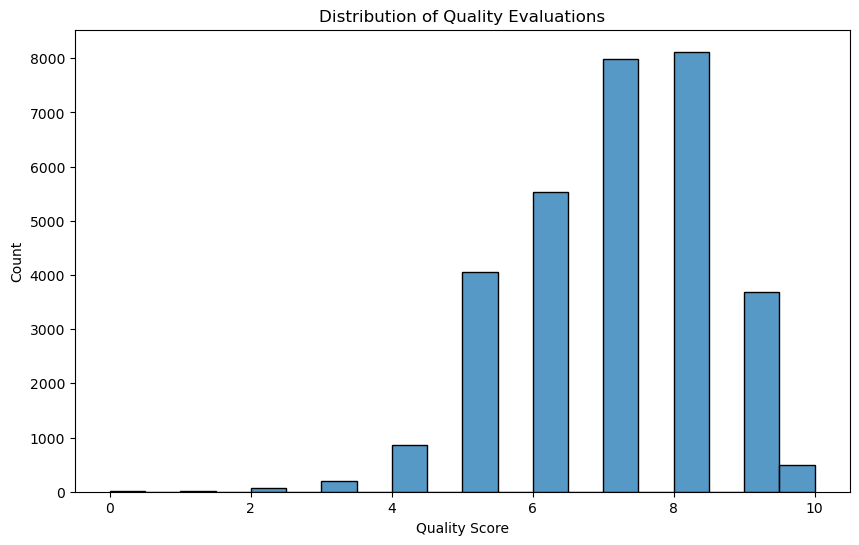

In [51]:
# Check distribution of quality evaluations (quality control scores)
plt.figure(figsize=(10, 6))
sns.histplot(df_sample["QUALITY_EVALUATION"].dropna(), bins=20, alpha=0.75)
plt.title("Distribution of Quality Evaluations")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()


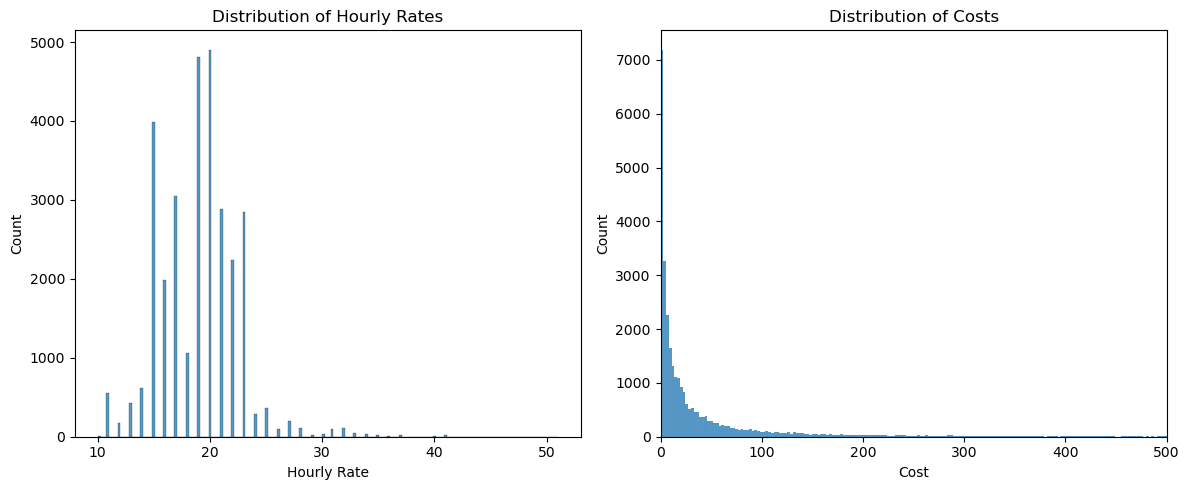

In [52]:
# Distribution of hourly rates and costs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_sample["HOURLY_RATE"].dropna())
plt.title("Distribution of Hourly Rates")
plt.xlabel("Hourly Rate")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(df_sample["COST"].dropna())
plt.title("Distribution of Costs")
plt.xlim(0, 500)
plt.xlabel("Cost")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

Shortest 5 tasks by turnaround time:


,ASSIGNED,DELIVERED,TURNAROUND_TIME
26025,2011-02-25 15:42:47,2011-02-25 15:42:51,0 days 00:00:04
15238,2010-09-16 12:21:47,2010-09-16 12:21:52,0 days 00:00:05
19658,2010-11-16 13:42:17,2010-11-16 13:42:22,0 days 00:00:05
15434,2010-09-22 11:31:06,2010-09-22 11:31:11,0 days 00:00:05
27200,2011-03-14 10:08:24,2011-03-14 10:08:29,0 days 00:00:05


Longest 5 tasks by turnaround time:


,ASSIGNED,DELIVERED,TURNAROUND_TIME
14092,2010-08-31 12:20:58,2010-12-18 10:10:04,108 days 21:49:06
878,2010-01-22 18:56:46,2010-05-17 15:29:59,114 days 20:33:13
25713,2011-02-21 13:16:24,2011-06-27 10:09:35,125 days 20:53:11
12208,2010-08-02 12:03:40,2011-01-31 15:43:56,182 days 03:40:16
4452,2010-03-31 11:29:19,2011-01-03 11:57:26,278 days 00:28:07


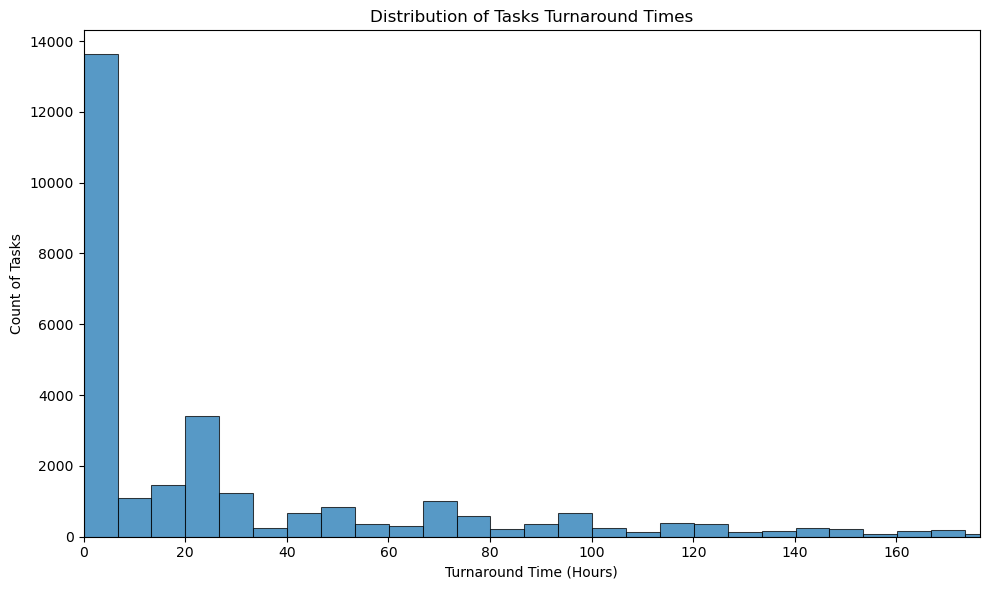

In [53]:
# Ensure date columns are in datetime format
for col in ["ASSIGNED", "DELIVERED"]:
    if not pd.api.types.is_datetime64_dtype(df_sample[col]):
        df_sample[col] = pd.to_datetime(df_sample[col], errors="coerce")

# Calculate raw timedelta (difference between DELIVERED and ASSIGNED)
mask = (~df_sample["ASSIGNED"].isnull()) & (~df_sample["DELIVERED"].isnull())
df_sample.loc[mask, "TURNAROUND_TIME"] = df_sample.loc[mask, "DELIVERED"] - df_sample.loc[mask, "ASSIGNED"]

# Keep changes in a new DataFrame
df_sample_filtered = df_sample.copy()

# Filter out unreasonable values (Negative turnaround times)
reasonable_mask = df_sample_filtered["TURNAROUND_TIME"].dt.total_seconds() > 0

# DataFrame sorted by turnaround time
df_sample_filtered = df_sample_filtered.loc[reasonable_mask].sort_values("TURNAROUND_TIME")


# Display shortest and longest tasks
print("Shortest 5 tasks by turnaround time:")
display(df_sample_filtered[["ASSIGNED", "DELIVERED", "TURNAROUND_TIME"]].head(5))
print("Longest 5 tasks by turnaround time:")
display(df_sample_filtered[["ASSIGNED", "DELIVERED", "TURNAROUND_TIME"]].tail(5))

# Visualize distribution of turnaround times (Transformed to hours)
plt.figure(figsize=(10, 6))
plt.hist(df_sample_filtered["TURNAROUND_TIME"].dt.total_seconds() / 3600, bins=1000, edgecolor="black", linewidth=0.75, alpha=0.75)
plt.title("Distribution of Tasks Turnaround Times")
plt.xlabel("Turnaround Time (Hours)")
plt.ylabel("Count of Tasks")
plt.xlim(0, (df_sample_filtered["TURNAROUND_TIME"].dt.total_seconds() / 3600).quantile(0.95))
plt.tight_layout()
plt.show()

In [54]:
# Calculate description turnaround time by translator
df_translator_turnaround = df_sample.loc[reasonable_mask].groupby("TRANSLATOR")["TURNAROUND_HOURS"].agg(
    ["median", "mean", "std", "count"]
).reset_index()
df_translator_turnaround = df_translator_turnaround.rename(columns={
    "median": "MEDIAN_TURNAROUND",
    "mean": "MEAN_TURNAROUND",
    "std": "STD_TURNAROUND",
    "count": "TASK_COUNT"
})

# Filter to translators with at least 5 tasks
df_translator_turnaround = df_translator_turnaround[df_translator_turnaround["TASK_COUNT"] >= 5]

print("Top 10 translators by median turnaround time (fastest first):")
display(df_translator_turnaround.sort_values("MEDIAN_TURNAROUND").head(20))

KeyError: 'Column not found: TURNAROUND_HOURS'

## Data Cleaning and Preprocessing

In [ ]:
def standardize_language(lang, database):
    """
    Standardize a language name to match a reference list using Levenshtein distance

    Parameters:
    lang (str): Language to standardize
    database (list): List of reference language names

    Returns:
    str: Standardized language name
    """
    # Lowercase the language name
    reference_list = [x.lower() for x in database if isinstance(x, str)]
    
    # Levenshtein distance to get the closest match
    closest = difflib.get_close_matches(lang.lower(), reference_list, n=1, cutoff=0)[0]
    
    # Get the index of the closest match and return the original case from reference_list
    index = reference_list.index(closest)
    
    return database[index]

# Database
all_languages = np.sort(pd.concat([
    df_sample["SOURCE_LANG"],
    df_sample["TARGET_LANG"],
    df_translators["SOURCE_LANG"],
    df_translators["TARGET_LANG"]
]).dropna().unique())

In [ ]:
all_languages

```python
# Example
new_input_lang = "Spanish (Iberiano)"

# Standardize the language
standardized_lang = standardize_language(new_input_lang, all_languages)
print(standardized_lang) 


# Example using Dataframe
new_record = pd.DataFrame([{
    "PROJECT_ID": 213495,
    "PM": "JSM",
    "TASK_ID": 10048286,
    "START": "2014-11-27 09:00:00",
    "END": "2014-11-27 13:00:00",
    "TASK_TYPE": "Translation",
    "SOURCE_LANG": "Spanishh (Iberian)",
    "TARGET_LANG": "Englisasdh",
    "TRANSLATOR": "Carlos",
    "ASSIGNED": "2014-11-27 08:30:00",
    "CLOSE": "2014-11-27 14:00:00",
    "FORECAST": 0.5,
    "HOURLY_RATE": 30,
    "COST": 15.0,
    "QUALITY_EVALUATION": 8,
    "MANUFACTURER": "Global Tech",
    "MANUFACTURER_SECTOR": "Technology",
    "MANUFACTURER_INDUSTRY_GROUP": "Software & Services",
    "MANUFACTURER_INDUSTRY": "IT Services",
    "MANUFACTURER_SUBINDUSTRY": "Data Processing & Outsourced Services"
}])

# Dataframe
new_record_df = new_record

# Display results
display(new_record_df)

new_record_df["SOURCE_LANG"] = new_record_df["SOURCE_LANG"].apply(standardize_language, database=all_languages)
new_record_df["TARGET_LANG"] = new_record_df["TARGET_LANG"].apply(standardize_language, database=all_languages)

display(new_record_df)


````